In [58]:
import pandas as pd
import matplotlib.pyplot 
import seaborn as sns
import scipy.stats
import statsmodels.api as sm

In [41]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [42]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [43]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [44]:
boston_df["AGE"].astype(int)

0      65
1      78
2      61
3      45
4      54
       ..
501    69
502    76
503    91
504    89
505    80
Name: AGE, Length: 506, dtype: int32

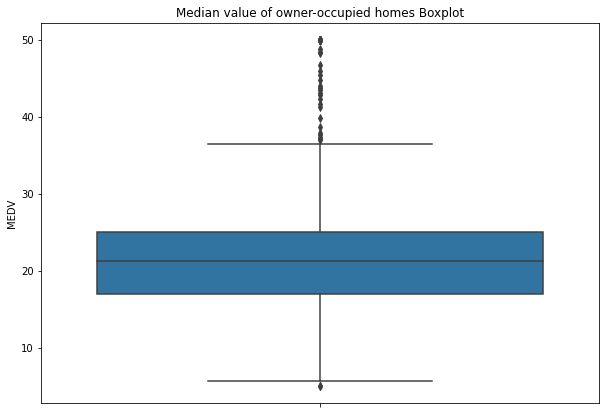

In [45]:
plt.figure(figsize=(10,7))
sns.boxplot(data=boston_df, y="MEDV")
plt.title('Median value of owner-occupied homes Boxplot')
plt.show()

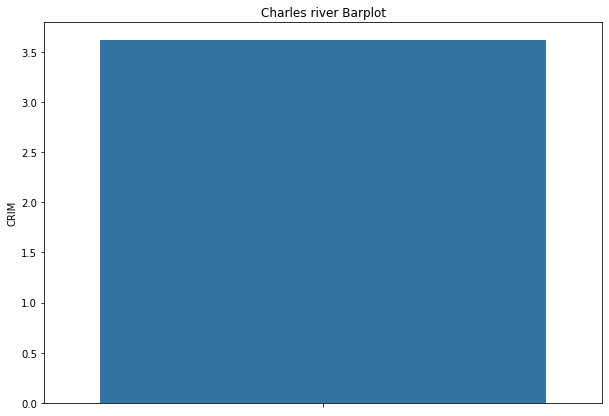

In [46]:
plt.figure(figsize=(10,7))
sns.barplot(data=boston_df, y="CRIM", ci=None)
plt.title('Charles river Barplot')
plt.show()

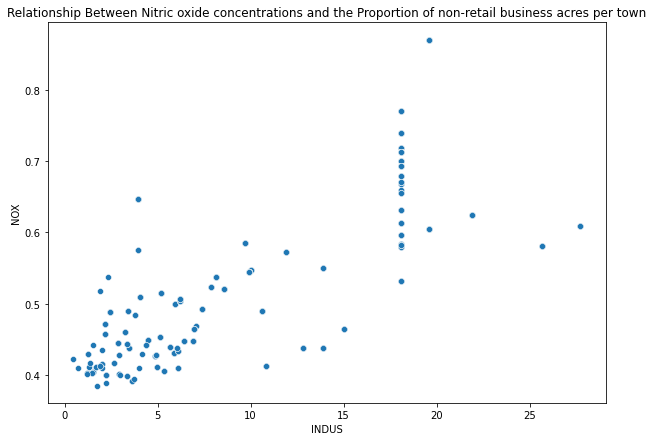

In [47]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=boston_df, x="INDUS", y="NOX")
plt.title('Relationship Between Nitric oxide concentrations and the Proportion of non-retail business acres per town')
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


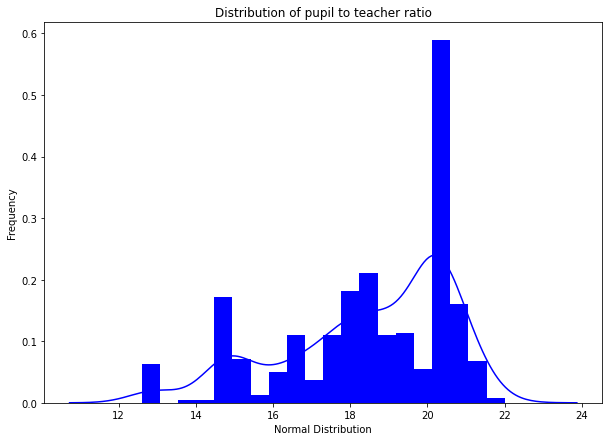

In [61]:
plt.figure(figsize=(10,7))
plt.title('Distribution of pupil to teacher ratio')
ax = sns.distplot(boston_df['PTRATIO'],
                  bins=20,
                  kde=True,
                  color='blue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
plt.show()

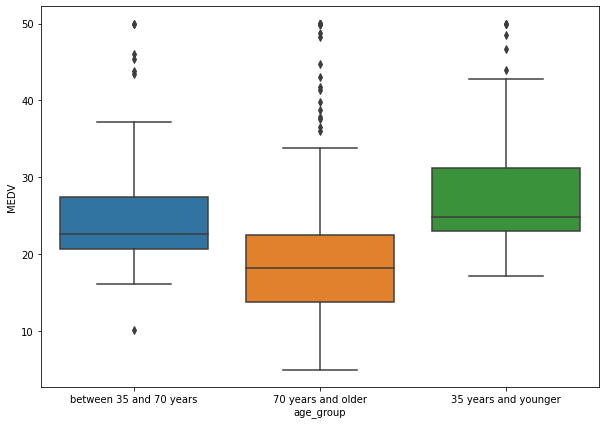

In [49]:
plt.figure(figsize=(10,7))
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'
sns.boxplot(data=boston_df, x="age_group", y="MEDV")
plt.show()

### HYPOTHESIS
𝐻0:µ1=µ2
  ("there is no significant difference in median value of houses bounded by the Charles river")
  
𝐻1:µ1≠µ2
 ("there is a significant difference in median value of houses bounded by the Charles river")
 
 α = 0.05

In [50]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                  boston_df[boston_df['CHAS'] == 1.0]['MEDV'], equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

#### Conclusion: Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses bounded by the Charles river

### State the hypothesis

𝐻0:µ1=µ2=µ3
  There is no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (age groups
  
𝐻1:
  At least one of the means differ
  
  α = 0.05

#### Test for quality of variance

In [56]:
scipy.stats.levene(boston_df.loc[(boston_df['AGE'] <= 35)]['MEDV'],
                  boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70)]['MEDV'],
                  boston_df.loc[(boston_df['AGE'] >= 70)]['MEDV'], center='mean')

LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)

In [54]:
Thirtyfive_years_and_younger=boston_df.loc[(boston_df['AGE'] <= 35)]['MEDV']
between_35_and_70_years=boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70)]['MEDV']
Seventy_years_and_older=boston_df.loc[(boston_df['AGE'] >= 70)]['MEDV']
f_statistic, p_value = scipy.stats.f_oneway(Thirtyfive_years_and_younger, between_35_and_70_years, Seventy_years_and_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


#### Conclusion: Since the p-value is less than 0.05, we  reject the null hypothesis as there is a significant evidence that at least one of the means differ.

### HYPOTHESIS

#### State the hypothesis:

𝐻0:
  There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

𝐻1:
 There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
  
   α = 0.05

In [53]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209161, 7.913361061230596e-98)

#### Conclusion: Since the p-value (Sig. (2-tailed) < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

### HYPOTHESIS

#### State the hypothesis

𝐻0:
   Additional weighted distance  to the five Boston employment centres has no impact on the median value of owner occupied homes

𝐻1:
  Additional weighted distance  to the five Boston employment centres has an impact on the median value of owner occupied homes

In [59]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
# Print out the statistics
model.summary()

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 05 Jun 2023   Prob (F-statistic):           1.21e-08
Time:                        00:23:42   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusion: The p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as additional weighted distance to the five Boston employment centres has an impact on the median value of owner occupied homes. The coefficient is 1.0916 